In [1]:
import pandas as pd
import numpy as np
import 

In [2]:
df_2021 = pd.read_excel("PedLin_2021.xlsx")

In [3]:
df_2022 = pd.read_excel("PedLin_2022.xlsx")

In [14]:
df_2022.ImporteBruto.sum()-df_2022.ImporteCoste.sum()

3498318.4223334715

In [23]:
df_2022

,EjercicioPedido,SeriePedido,NumeroPedido,Orden,FechaRegistro,FechaPedido,CodigoArticulo,Partida,CodigoFamilia,CodigoSubfamilia,...,ImporteCoste,ImporteBruto,ImporteNeto,BaseImponible,BaseIva,CuotaIva,TotalIva,ImporteLiquido,TipoArticulo,CO_Ubicacion
0,2022,BM,1,5,2022-01-04 08:20:45.993,2022-01-04,570137,107A,57.0,57125.0,...,34.90,39.60,39.60,39.6000,39.6000,3.960,3.960,43.5600,M,080203
1,2022,BM,2,5,2022-01-04 12:50:18.600,2022-01-04,031016,21143409,3.0,3102.0,...,24.72,28.37,28.37,28.3700,28.3700,2.837,2.837,31.2070,M,NaN
2,2022,BM,2,10,2022-01-04 12:50:43.753,2022-01-04,031016,21165401,3.0,3102.0,...,24.72,28.37,28.37,28.3700,28.3700,2.837,2.837,31.2070,M,NaN
3,2022,BM,2,15,2022-01-04 12:51:00.567,2022-01-04,031016,21194408,3.0,3102.0,...,24.72,28.37,28.37,28.3700,28.3700,2.837,2.837,31.2070,M,NaN
4,2022,BM,2,20,2022-01-04 12:51:19.100,2022-01-04,031013,21184408,3.0,3102.0,...,88.45,102.78,102.78,102.7800,102.7800,10.278,10.278,113.0580,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495418,2022,RGV,1638,0,2022-12-30 15:49:57.917,2022-12-30,630553,NaN,63.0,63001.0,...,21.04,24.18,24.18,21.2784,21.2784,0.000,0.000,21.2784,M,070603
495419,2022,RGV,1638,0,2022-12-30 15:49:45.750,2022-12-30,100131,NaN,69.0,69112.0,...,40.32,50.40,50.40,44.3520,44.3520,0.000,0.000,44.3520,M,080702
495420,2022,RGV,1638,0,2022-12-30 15:50:42.663,2022-12-30,090205,NaN,69.0,69105.0,...,7.36,9.20,9.20,8.0960,8.0960,0.000,0.000,8.0960,M,061400
495421,2022,RGV,1638,0,2022-12-30 15:49:51.303,2022-12-30,050129,NaN,5.0,5119.0,...,87.76,105.31,105.31,92.6728,92.6728,0.000,0.000,92.6728,M,071302


In [11]:
df_2022.ImporteBruto.sum()

29410052.549999993

In [22]:
df_2022.FechaPedido= pd.to_datetime(df_2022.FechaPedido)

In [30]:
df_2022['FechaPedido'].groupby(pd.Grouper(freq='M'))




TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [31]:
df_2022['month'] = df_2022.FechaPedido.dt.month
df_2022['month']

0          1
1          1
2          1
3          1
4          1
          ..
495418    12
495419    12
495420    12
495421    12
495422    12
Name: month, Length: 495423, dtype: int64

In [47]:
df_2021['month'] = df_2021.FechaPedido.dt.month
df_2021['month']

0          1
1          1
2          1
3          1
4          1
          ..
463251    12
463252    12
463253    12
463254    12
463255    12
Name: month, Length: 463256, dtype: int64

In [40]:
df_2022.groupby("month").ImporteNeto.sum().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

<AxesSubplot:xlabel='month'>

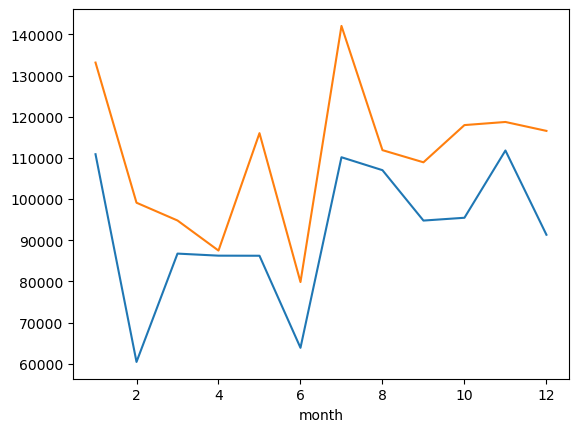

In [49]:
#df_2022.groupby("month").ImporteNeto.sum().plot()
#df_2022.groupby("month").ImporteCoste.sum().plot()
df_2022.groupby("month").margen.sum().plot()
df_2021.groupby("month").margen.sum().plot()




In [48]:
df_2021["margen"] = df_2021.ImporteNeto-df_2021.ImporteCoste

In [28]:
df_2022.FechaPedido.dt.month.value_counts().sort_index()

1     36954
2     36957
3     42595
4     38904
5     44868
6     41732
7     41014
8     41053
9     41531
10    42855
11    43907
12    43053
Name: FechaPedido, dtype: int64

In [8]:
df_def = pd.concat([df_2021, df_2022])

In [9]:
df_def

,EjercicioPedido,SeriePedido,NumeroPedido,Orden,FechaRegistro,FechaPedido,CodigoArticulo,Partida,CodigoFamilia,CodigoSubfamilia,...,ImporteCoste,ImporteBruto,ImporteNeto,BaseImponible,BaseIva,CuotaIva,TotalIva,ImporteLiquido,TipoArticulo,CO_Ubicacion
0,2021,BM,1,5,2021-01-04 10:36:31.150,2021-01-04,031011,19452406,3.0,3102.0,...,22.81,27.14,27.14,27.1400,27.1400,2.714,2.714,29.8540,M,NaN
1,2021,BM,1,10,2021-01-04 10:36:42.503,2021-01-04,031011,20103415,3.0,3102.0,...,68.43,81.43,81.43,81.4300,81.4300,8.143,8.143,89.5730,M,NaN
2,2021,BM,1,15,2021-01-04 10:36:52.677,2021-01-04,031004,20354405,3.0,3102.0,...,561.00,617.10,617.10,617.1000,617.1000,61.710,61.710,678.8100,M,NaN
3,2021,BM,1,20,2021-01-04 10:37:13.327,2021-01-04,680001,CXXCXT,68.0,NaN,...,466.40,488.75,488.75,488.7500,488.7500,48.875,48.875,537.6250,M,NaN
4,2021,BM,2,5,2021-01-04 16:25:36.607,2021-01-04,060040,AL021295T,59.0,59110.0,...,20.43,20.43,20.43,20.4300,20.4300,2.043,2.043,22.4730,M,11G05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495418,2022,RGV,1638,0,2022-12-30 15:49:57.917,2022-12-30,630553,NaN,63.0,63001.0,...,21.04,24.18,24.18,21.2784,21.2784,0.000,0.000,21.2784,M,070603
495419,2022,RGV,1638,0,2022-12-30 15:49:45.750,2022-12-30,100131,NaN,69.0,69112.0,...,40.32,50.40,50.40,44.3520,44.3520,0.000,0.000,44.3520,M,080702
495420,2022,RGV,1638,0,2022-12-30 15:50:42.663,2022-12-30,090205,NaN,69.0,69105.0,...,7.36,9.20,9.20,8.0960,8.0960,0.000,0.000,8.0960,M,061400
495421,2022,RGV,1638,0,2022-12-30 15:49:51.303,2022-12-30,050129,NaN,5.0,5119.0,...,87.76,105.31,105.31,92.6728,92.6728,0.000,0.000,92.6728,M,071302
